In [2]:
# !pip install scikit-survival


In [1]:
import sksurv
from sksurv.datasets import load_veterans_lung_cancer
from sksurv.nonparametric import kaplan_meier_estimator
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Text(0.5, 0, 'time $t$ (days)')

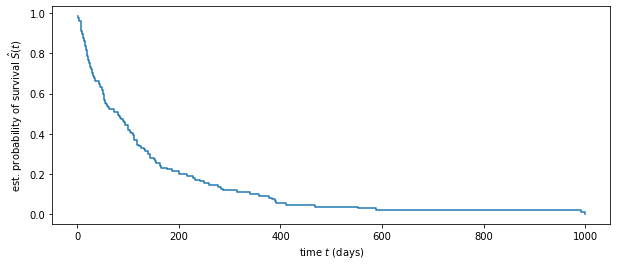

In [2]:
plt.figure(figsize = (10, 4))
data_x, data_y = load_veterans_lung_cancer()
time, survival_prob = kaplan_meier_estimator(data_y["Status"], data_y["Survival_in_days"])
plt.step(time, survival_prob, where="post")
plt.ylabel("est. probability of survival $\hat{S}(t)$")
plt.xlabel("time $t$ (days)")

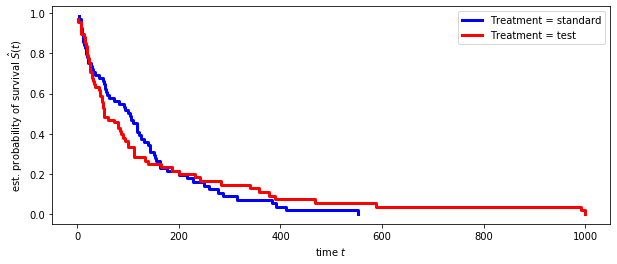

In [3]:
plt.figure(figsize = (10, 4))

for treatment_type, color in zip(("standard", "test"), ('b', 'r')):
    mask_treat = data_x["Treatment"] == treatment_type
    time_treatment, survival_prob_treatment = kaplan_meier_estimator(
        data_y["Status"][mask_treat],
        data_y["Survival_in_days"][mask_treat])

    plt.step(time_treatment, survival_prob_treatment, where="post",
             label="Treatment = %s" % treatment_type, color = color, linewidth = 3)

plt.ylabel("est. probability of survival $\hat{S}(t)$")
plt.xlabel("time $t$")
plt.legend(loc="best")

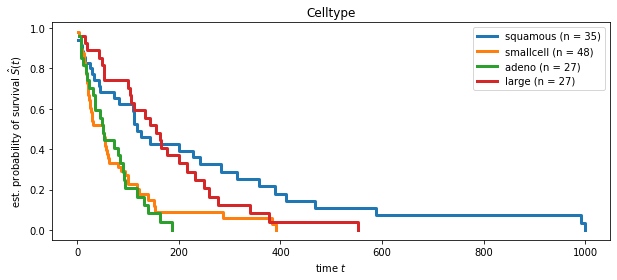

In [4]:
plt.figure(figsize = (10, 4))
for value in data_x["Celltype"].unique():
    mask = data_x["Celltype"] == value
    time_cell, survival_prob_cell = kaplan_meier_estimator(data_y["Status"][mask],
                                                           data_y["Survival_in_days"][mask])
    plt.step(time_cell, survival_prob_cell, where="post",
             label="%s (n = %d)" % (value, mask.sum()), linewidth = 3)
plt.title('Celltype')
plt.ylabel("est. probability of survival $\hat{S}(t)$")
plt.xlabel("time $t$")
plt.legend(loc="best")

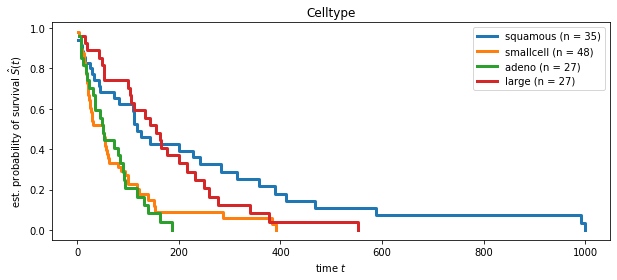

In [5]:
plt.figure(figsize = (10, 4))
for value in data_x["Celltype"].unique():
    mask = data_x["Celltype"] == value
    time_cell, survival_prob_cell = kaplan_meier_estimator(data_y["Status"][mask],
                                                           data_y["Survival_in_days"][mask])
    plt.step(time_cell, survival_prob_cell, where="post",
             label="%s (n = %d)" % (value, mask.sum()), linewidth = 3)
plt.title('Celltype')
plt.ylabel("est. probability of survival $\hat{S}(t)$")
plt.xlabel("time $t$")
plt.legend(loc="best")

In [6]:
from sksurv.preprocessing import OneHotEncoder

data_x_numeric = OneHotEncoder().fit_transform(data_x)
data_x_numeric.head()

,Age_in_years,Celltype=large,Celltype=smallcell,Celltype=squamous,Karnofsky_score,Months_from_Diagnosis,Prior_therapy=yes,Treatment=test
0,69.0,0.0,0.0,1.0,60.0,7.0,0.0,0.0
1,64.0,0.0,0.0,1.0,70.0,5.0,1.0,0.0
2,38.0,0.0,0.0,1.0,60.0,3.0,0.0,0.0
3,63.0,0.0,0.0,1.0,60.0,9.0,1.0,0.0
4,65.0,0.0,0.0,1.0,70.0,11.0,1.0,0.0


In [7]:
from sklearn import set_config
from sksurv.linear_model import CoxPHSurvivalAnalysis

set_config(display="text")  # displays text representation of estimators

estimator = CoxPHSurvivalAnalysis()
estimator.fit(data_x_numeric, data_y)


CoxPHSurvivalAnalysis()

In [8]:
for i in data_x_numeric.columns:
    print(i, sorted(data_x_numeric[i].unique()))

Age_in_years [34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 81.0]
Celltype=large [0.0, 1.0]
Celltype=smallcell [0.0, 1.0]
Celltype=squamous [0.0, 1.0]
Karnofsky_score [10.0, 20.0, 30.0, 40.0, 50.0, 60.0, 70.0, 75.0, 80.0, 85.0, 90.0, 99.0]
Months_from_Diagnosis [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 21.0, 22.0, 23.0, 25.0, 28.0, 29.0, 36.0, 58.0, 87.0]
Prior_therapy=yes [0.0, 1.0]
Treatment=test [0.0, 1.0]


In [9]:
x_new = pd.DataFrame.from_dict({
    1: [65, 0, 0, 1, 60, 1, 0, 1],
    2: [65, 0, 0, 1, 60, 1, 0, 0],
    3: [65, 0, 1, 0, 60, 1, 0, 0],
    4: [65, 0, 1, 0, 60, 1, 0, 1],
    5: [34, 0, 1, 0, 10, 1, 0, 1]},
     columns=data_x_numeric.columns, orient='index')
x_new

,Age_in_years,Celltype=large,Celltype=smallcell,Celltype=squamous,Karnofsky_score,Months_from_Diagnosis,Prior_therapy=yes,Treatment=test
1,65,0,0,1,60,1,0,1
2,65,0,0,1,60,1,0,0
3,65,0,1,0,60,1,0,0
4,65,0,1,0,60,1,0,1
5,34,0,1,0,10,1,0,1


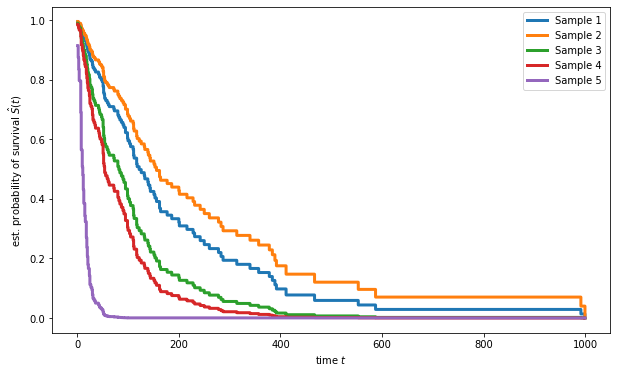

In [10]:
import numpy as np
plt.figure(figsize = (10, 6))

pred_surv = estimator.predict_survival_function(x_new)
time_points = np.arange(1, 1000)
for i, surv_func in enumerate(pred_surv):
    plt.step(time_points, surv_func(time_points), where="post",
             label="Sample %d" % (i + 1), linewidth = 3)
plt.ylabel("est. probability of survival $\hat{S}(t)$")
plt.xlabel("time $t$")
plt.legend(loc="best")

In [14]:
import lifelines


In [15]:
life = pd.concat([data_x, pd.DataFrame(data_y)], axis = 1)


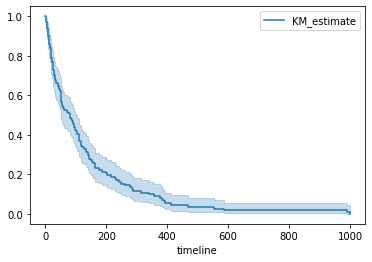

In [16]:
import lifelines
kmf = lifelines.KaplanMeierFitter()


kmf.fit(durations = life.Survival_in_days, event_observed = life.Status)
kmf.plot()


In [17]:
cox = lifelines.CoxPHFitter()
results = cox.fit(life, duration_col = 'Survival_in_days', event_col = 'Status')
cox.print_summary()

ValueError: could not convert string to float: 'squamous'

<Axes: xlabel='log(HR) (95% CI)'>

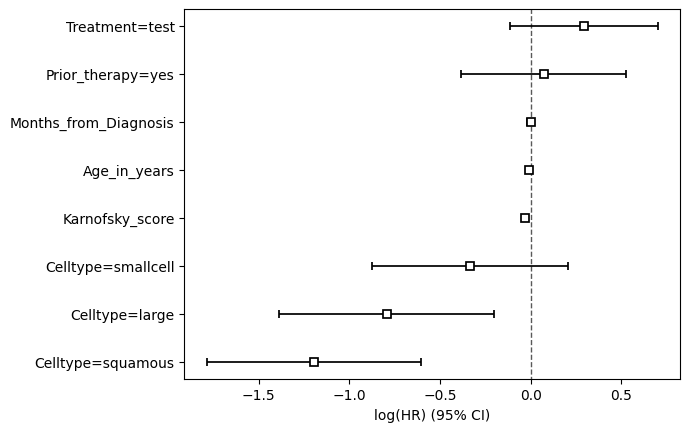

In [37]:
cox.plot()

<Axes: >

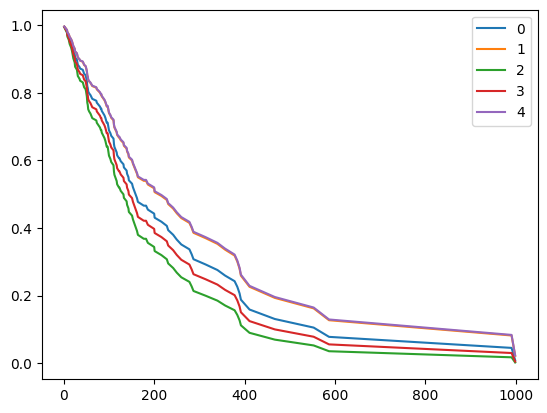

In [38]:
cox.predict_survival_function(life.iloc[0:5, ...]).plot()

In [18]:
life

,Age_in_years,Celltype,Karnofsky_score,Months_from_Diagnosis,Prior_therapy,Treatment,Status,Survival_in_days
0,69.0,squamous,60.0,7.0,no,standard,True,72.0
1,64.0,squamous,70.0,5.0,yes,standard,True,411.0
2,38.0,squamous,60.0,3.0,no,standard,True,228.0
3,63.0,squamous,60.0,9.0,yes,standard,True,126.0
4,65.0,squamous,70.0,11.0,yes,standard,True,118.0
...,...,...,...,...,...,...,...,...
132,65.0,large,75.0,1.0,no,test,True,133.0
133,64.0,large,60.0,5.0,no,test,True,111.0
134,67.0,large,70.0,18.0,yes,test,True,231.0
135,65.0,large,80.0,4.0,no,test,True,378.0


In [6]:
d

ImportError: 
`load_boston` has been removed from scikit-learn since version 1.2.

The Boston housing prices dataset has an ethical problem: as
investigated in [1], the authors of this dataset engineered a
non-invertible variable "B" assuming that racial self-segregation had a
positive impact on house prices [2]. Furthermore the goal of the
research that led to the creation of this dataset was to study the
impact of air quality but it did not give adequate demonstration of the
validity of this assumption.

The scikit-learn maintainers therefore strongly discourage the use of
this dataset unless the purpose of the code is to study and educate
about ethical issues in data science and machine learning.

In this special case, you can fetch the dataset from the original
source::

    import pandas as pd
    import numpy as np

    data_url = "http://lib.stat.cmu.edu/datasets/boston"
    raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
    data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
    target = raw_df.values[1::2, 2]

Alternative datasets include the California housing dataset and the
Ames housing dataset. You can load the datasets as follows::

    from sklearn.datasets import fetch_california_housing
    housing = fetch_california_housing()

for the California housing dataset and::

    from sklearn.datasets import fetch_openml
    housing = fetch_openml(name="house_prices", as_frame=True)

for the Ames housing dataset.

[1] M Carlisle.
"Racist data destruction?"
<https://medium.com/@docintangible/racist-data-destruction-113e3eff54a8>

[2] Harrison Jr, David, and Daniel L. Rubinfeld.
"Hedonic housing prices and the demand for clean air."
Journal of environmental economics and management 5.1 (1978): 81-102.
<https://www.researchgate.net/publication/4974606_Hedonic_housing_prices_and_the_demand_for_clean_air>
